In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr
from math import sqrt

## 1. Đọc dữ liệu

In [2]:
#Đọc dữ liệu
data= pd.read_csv('Case_study_CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Tạo bản sao dữ liệu
car=data.copy()

## 2. Phân tích sơ bộ cấu trúc dữ liệu

In [4]:
#Cấu trúc dữ liệu
print(f'{car.info()}')
print(f'Tổng số lượng dữ liệu trùng lặp: {car.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#Thuộc tính doornumber (số lượng cửa) và cylindernumber (số lượng xi lanh đặt trong xe) đang được nhập dưới dạng chữ, kiểu dữ liệu object. Chuẩn hóa lại dữ liệu về dạng số.
#Chuẩn hóa cột doornumber
car['doornumber'].unique()
car['doornumber'].replace(['two', 'four'],[2,4], inplace=True)
car['doornumber'].unique()

array([2, 4], dtype=int64)

In [6]:
#Chuẩn hóa cột cylindernumber
car['cylindernumber'].unique()
car['cylindernumber'].replace(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],[4, 6, 5, 3, 12, 2, 8], inplace=True)
car['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [7]:
# Phân tích sơ bộ dữ liệu
car.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


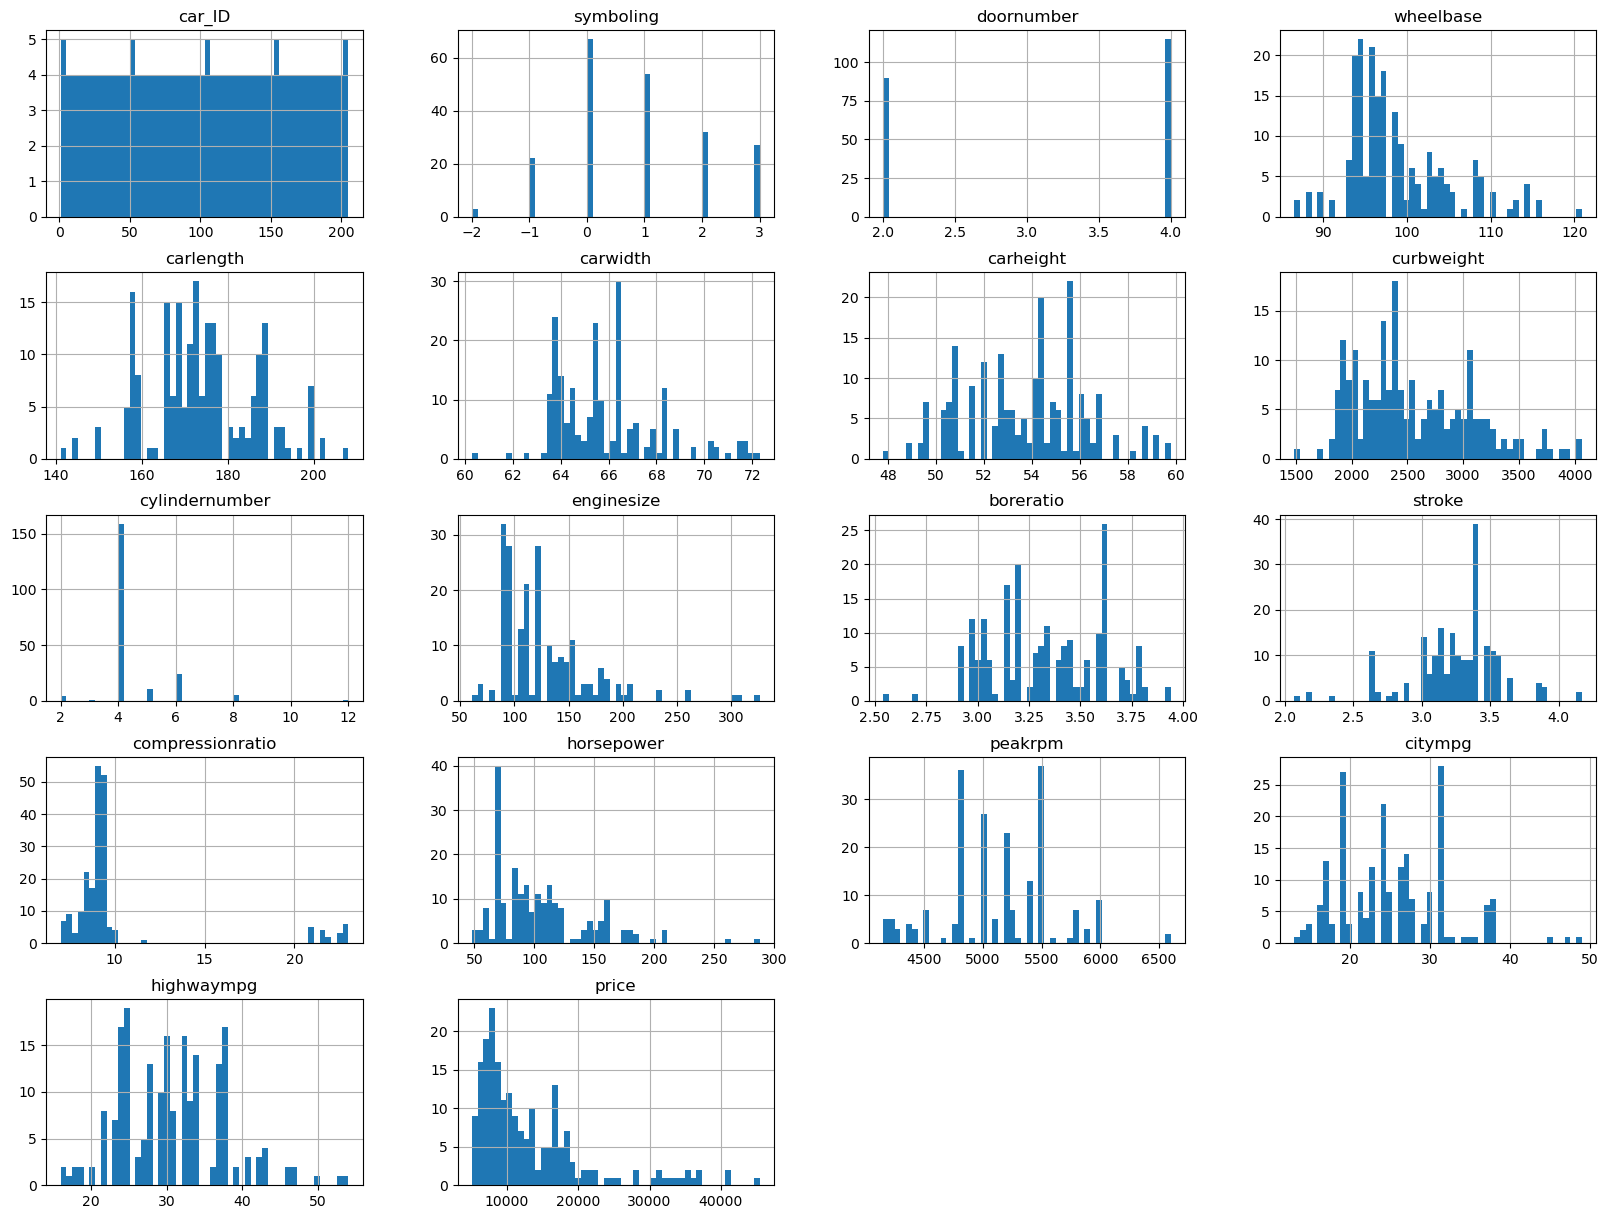

In [8]:
import matplotlib.pyplot as plt
car.hist(bins=50, figsize=(20,15))
plt.show()

Nhận xét: Tập dữ liệu đang thu thập gồm 25 yếu tố có thể ảnh hưởng tới giá xe hơi (26 cột, 205 dòng). 
 - Tất cả các cột đều ghi nhận đầy đủ 205 giá trị --> không có dữ liệu khuyết thiếu. 
 - Kiểm tra thông tin của tất cả các dòng không có dòng nào giống hệt nhau -> không có dữ liệu trùng lặp.
 - Dữ liệu một số thuộc tính định lượng có xu hướng phân bố lệch trái
 - Mean và Mod của các thuộc tính định lượng không có sự khác biệt quá lớn. Riêng giá xe có sự khác biệt tương đối.

## 3. Kiểm định mức tương quan giữa các thuộc tính và giá xe hơi

In [9]:
#Kiểm định tương quan giữa các thuộc tính định lượng và giá xe hơi
from scipy import  stats 
corr_matrix = car.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Nhận xét:
- 3 thuộc tính định lượng có mức tương quan (ảnh hường) lớn nhất tới giá xe hơi gồm: enginesize, curbweight và horsepower. 
- Ngoài ra 3 thuộc tính cần xem xét đưa vào mô hình: carwidth, cylindernumber, carlength.

In [10]:
#Kiểm định tương quan giữa thuộc tính định tính và giá xe hơi
# Sử dụng LabelEncodeing để mã hóa và hệ số corr để xem xét tương quan giữa tên xe/ thân xe và giá xe sau đó so sánh với kết quả của kiểm định spearman
# Mã hóa tên xe
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
car['CarName_code'] = encoder.fit_transform(car['CarName'].values)
car['carbody_code'] = encoder.fit_transform(car['carbody'].values)
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_code,carbody_code
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,3,0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,2
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,4,3
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,139,3
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,138,3
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,140,3
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,142,3


In [11]:
#Xem xét tương quan giữa tên xe, thân xe và giá xe sau khi mã hóa
corr_matrix = car.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
symboling          -0.079978
carbody_code       -0.083976
peakrpm            -0.085267
car_ID             -0.109093
CarName_code       -0.231439
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [12]:
#Kiểm định tương quan giữa thuộc tính tên xe/thân xe và giá xe hơi bằng Spearman
#Tên xe và giá xe 
from scipy import  stats 
r, pvalue = stats.spearmanr(car['CarName'],car['price'])
print('r =',r)
print('pvalue =',pvalue)


r = -0.06878041366215054
pvalue = 0.3271231604946927


In [13]:
#Thân xe và giá xe 
r, pvalue = stats.spearmanr(car['carbody'],car['price'])
print('r =',r)
print('pvalue =',pvalue)

r = 0.09178485959664219
pvalue = 0.19057227497525178


Nhận xét: 
- Việc mã hóa dữ liệu tên xe bằng phương pháp LabelEncoding sau đó tính toán hệ số tương quan corr và sử dụng kiểm định Spearman đều cho kết quả mức tương quan thấp (Corr = -0.231439; pvalue = 0.32712 > alpha=0.05) -> Thuộc tính tên xe có mức ảnh hưởng thấp đến giá xe. 
- Kết quả tương tự đối với thân xe và giá xe.

--> Sử dụng kiểm định Spearman cho tất cả các thuộc tính định tính

In [14]:
car.columns[car.dtypes=='object']

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [15]:
#Kiểm định spearman cho các thuộc tính định tính và giá xe hơi
car_qual=car[['CarName','fueltype','aspiration','carbody', 'drivewheel','enginelocation','enginetype','fuelsystem','price']]
p=[]
for i in range(len(car_qual.columns)-1):
    r, pvalue = stats.spearmanr(car[car_qual.columns[i]],car_qual['price'])
    if pvalue < 0.05: p.append(f'{car_qual.columns[i]}:{pvalue}')
p

['fueltype:0.04568297411674289',
 'aspiration:6.5637546727367955e-06',
 'drivewheel:4.9537966157749595e-24',
 'enginelocation:0.005092262581381994',
 'fuelsystem:2.0468628898699014e-29']

Nhận xét: 03 thuộc tính định tính có khả năng ảnh hưởng lớn tới giá xe hơi (pvalue << alpha=0.05) bao gồm: aspiration, drivewheel và fuelsystem. -> Mã hóa dữ liệu các cột định tính để đưa vào mô hình.

--> Tổng hợp các yếu tố định tính và định lượng xem xét đưa vào mô hình gồm:
- Định lượng: enginesize, curbweight và horsepower, cân nhắc các yếu tố carwidth, cylindernumber và highwaympg nếu 03 biến định lượng có mức tương quan lớn với nhau/mô hình cho score thấp.
- Định tính: aspiration, drivewheel và fuelsystem


## 4. Lựa chọn các thuộc tính đưa vào mô hình

In [16]:
#Thuộc tính lựa chọn đưa vào mô hình căn cứ kết quả thử nghiệm kiểm định
df_car = car.loc[:,('aspiration','drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth', 'cylindernumber', 'highwaympg','price')]
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      205 non-null    object 
 1   drivewheel      205 non-null    object 
 2   fuelsystem      205 non-null    object 
 3   enginesize      205 non-null    int64  
 4   curbweight      205 non-null    int64  
 5   horsepower      205 non-null    int64  
 6   carwidth        205 non-null    float64
 7   cylindernumber  205 non-null    int64  
 8   highwaympg      205 non-null    int64  
 9   price           205 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.1+ KB


Mã hóa dữ liệu 3 thuộc tính định tính lựa chọn đưa vào mô hình; kiểm định lại tương quan giữa các thuộc tính

In [17]:
# Sử dụng Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_car['aspiration']=encoder.fit_transform(df_car['aspiration'])
df_car['drivewheel']=encoder.fit_transform(df_car['drivewheel'])
df_car['fuelsystem']=encoder.fit_transform(df_car['fuelsystem'])
df_car

,aspiration,drivewheel,fuelsystem,enginesize,curbweight,horsepower,carwidth,cylindernumber,highwaympg,price
0,0,2,5,130,2548,111,64.1,4,27,13495.0
1,0,2,5,130,2548,111,64.1,4,27,16500.0
2,0,2,5,152,2823,154,65.5,6,26,16500.0
3,0,1,5,109,2337,102,66.2,4,30,13950.0
4,0,0,5,136,2824,115,66.4,5,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
200,0,2,5,141,2952,114,68.9,4,28,16845.0
201,1,2,5,141,3049,160,68.8,4,25,19045.0
202,0,2,5,173,3012,134,68.9,6,23,21485.0
203,1,2,3,145,3217,106,68.9,6,27,22470.0


In [18]:
#Kiểm định lại mức tương quan giữa các thuộc tính sau mã hóa và giá xe
from scipy import  stats 
corr_matrix = df_car.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)

price             1.000000
enginesize        0.874145
curbweight        0.835305
horsepower        0.808139
carwidth          0.759325
cylindernumber    0.718305
drivewheel        0.577992
fuelsystem        0.526823
aspiration        0.177926
highwaympg       -0.697599
Name: price, dtype: float64

In [19]:
#Bộ dữ liệu thử nghiệm 1. 
#Các thuộc tính lựa chọn gồm 5 thuộc tính định lượng và 1 thuộc tính định tính có tương quan lớn gồm: 
#'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth'
car1=df_car.loc[:,('drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth','price')]
from sklearn.model_selection import train_test_split
train_set1, test_set1 = train_test_split(car1, test_size = 0.2, random_state=42)

In [20]:
#Kiểm định lại mức tương quan giữa các thuộc tính sau khi mã hóa
from scipy import  stats 
corr_matrix = train_set1.corr(numeric_only=True)
corr_matrix['price'].sort_values(ascending = False)


price         1.000000
enginesize    0.866433
curbweight    0.824212
horsepower    0.810986
carwidth      0.744310
drivewheel    0.586441
fuelsystem    0.552034
Name: price, dtype: float64

<Axes: >

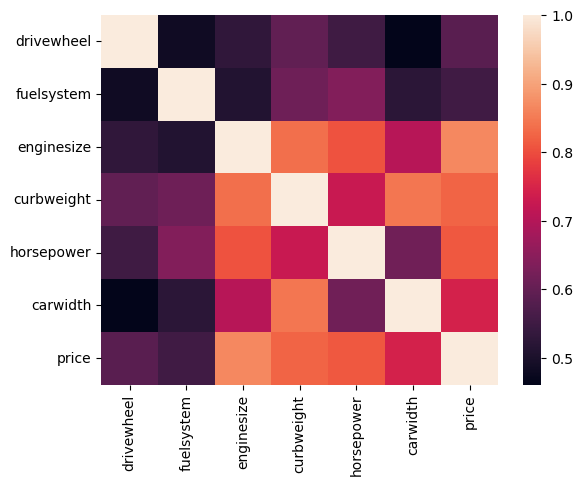

In [21]:
sns.heatmap(corr_matrix)

In [22]:
#Kiểm định tương quan giữa các thuộc tính
covar=[]
for i in range(0,len(train_set1.columns)-1,1):
    for j in range(i,len(train_set1.columns)-1,1):
        if i==j:
            continue
        r_coef, pl = pearsonr(train_set1[train_set1.columns[i]], train_set1[train_set1.columns[j]])
        if abs(r_coef) >= 0.7:
            covar.append(f'{train_set1.columns[i]} - {train_set1.columns[j]}: {r_coef}')
covar

['enginesize - curbweight: 0.835858938076455',
 'enginesize - horsepower: 0.804452164061477',
 'enginesize - carwidth: 0.7032852545273591',
 'curbweight - horsepower: 0.726686555598216',
 'curbweight - carwidth: 0.8448450947489039']

In [23]:
Xtrain=train_set1.iloc[:, :5].values
Xtrain
Xtest=test_set1.iloc[:, :5].values
ytrain=train_set1.iloc[:,-1]
ytrain
ytest=test_set1.iloc[:,-1]

In [24]:
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car1_model = LinearRegression()
car1_model.fit(Xtrain, ytrain.ravel())

LinearRegression()

In [25]:
car1_model.score(Xtrain, ytrain)

0.8149782696013206

In [26]:
car1_model.score(Xtest, ytest)

0.8353907001936591

Nhận xét: Điểm trên tập train và tập test chấp nhận được. Tuy nhiên các thuộc tính định lượng có hệ số tương quan cao.
-> loại bỏ thuộc tính horsepower và carwidth để kiểm tra mức độ tác động đến mô hình.

In [27]:
#Bộ dữ liệu thử nghiệm 2. Các thuộc tính lựa chọn gồm: 'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth'
car2=df_car.loc[:,('drivewheel','fuelsystem', 'enginesize', 'curbweight','price')]
from sklearn.model_selection import train_test_split
train_set2, test_set2 = train_test_split(car2, test_size = 0.2, random_state=42)

In [28]:
from scipy import  stats 
corr_matrix = train_set2.corr(numeric_only=True)
corr_matrix
corr_matrix['price'].sort_values(ascending = False)

price         1.000000
enginesize    0.866433
curbweight    0.824212
drivewheel    0.586441
fuelsystem    0.552034
Name: price, dtype: float64

In [29]:
# Kiểm định tương quan giữa các thuộc tính
covar=[]
for i in range(0,len(train_set2.columns)-1,1):
    for j in range(i,len(train_set2.columns)-1,1):
        if i==j:
            continue
        r_coef, pl = pearsonr(train_set2[train_set2.columns[i]], train_set2[train_set2.columns[j]])
        if abs(r_coef) >= 0.7:
            covar.append(f'{train_set2.columns[i]} - {train_set2.columns[j]}: {r_coef}')
covar

['enginesize - curbweight: 0.835858938076455']

In [30]:
# Mô hình thử nghiệm car2
Xtrain=train_set2.iloc[:, :3].values
Xtrain
Xtest=test_set2.iloc[:, :3].values
ytrain=train_set2.iloc[:,-1]
ytrain
ytest=test_set2.iloc[:,-1]
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car2_model = LinearRegression()
car2_model.fit(Xtrain, ytrain.ravel())

LinearRegression()

In [31]:
car2_model.score(Xtrain, ytrain)

0.7809699895359912

In [32]:
car2_model.score(Xtest, ytest)

0.8046177353955686

Nhận xét: Điểm trên tập train và tập test của mô hình car2 chấp nhận được. tuy nhiên việc loại bỏ 2 chỉ tiêu định lượng có tương quan lớn khiến điểm của mô hình car2 thấp hơn so với mô hình car1.

In [33]:
#Bộ dữ liệu thử nghiệm 3 - Chỉ bao gồm 3 thuộc tính định lượng có mức tương quan lớn nhất tới giá xe
car3=df_car.loc[:,('curbweight', 'enginesize','horsepower', 'price')]
from sklearn.model_selection import train_test_split
train_set3, test_set3 = train_test_split(car3, test_size = 0.2, random_state=42)

In [34]:
from scipy import  stats 
corr_matrix = train_set3.corr(numeric_only=True)
corr_matrix
corr_matrix['price'].sort_values(ascending = False)

price         1.000000
enginesize    0.866433
curbweight    0.824212
horsepower    0.810986
Name: price, dtype: float64

In [35]:
# Kiểm định tương quan giữa các thuộc tính
covar=[]
for i in range(0,len(train_set3.columns)-1,1):
    for j in range(i,len(train_set3.columns)-1,1):
        if i==j:
            continue
        r_coef, pl = pearsonr(train_set3[train_set3.columns[i]], train_set3[train_set3.columns[j]])
        if abs(r_coef) >= 0.7:
            covar.append(f'{train_set3.columns[i]} - {train_set3.columns[j]}: {r_coef}')
covar

['curbweight - enginesize: 0.835858938076455',
 'curbweight - horsepower: 0.726686555598216',
 'enginesize - horsepower: 0.804452164061477']

In [36]:
# Mô hình thử nghiệm car3
Xtrain=train_set3.iloc[:, :2].values
Xtrain
Xtest=test_set3.iloc[:, :2].values
ytrain=train_set3.iloc[:,-1]
ytrain
ytest=test_set3.iloc[:,-1]
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car3_model = LinearRegression()
car3_model.fit(Xtrain, ytrain.ravel())

LinearRegression()

In [37]:
car3_model.score(Xtrain, ytrain)

0.7838886280001216

In [38]:
car3_model.score(Xtest, ytest)

0.8264691761307673

Kết luận:
- Dựa trên kết quả 3 mô hình thử nghiệm lựa chọn các tiêu chí tác động đến giá xe gồm: 'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth'
- Việc loại bỏ các chỉ tiêu định lượng có tương quan cao lẫn nhau nhưng lại có tương quan lớn với giá xe khiến điểm của mô hình giảm sút
- Loại bỏ các chỉ tiêu định tính nhưng có mức tương quan lớn tới giá xe khiến khả năng dự báo của mô hình giảm sút
- Việc chỉ giữ lại 3 tiêu chí định tính khiến điểm của mô hình giảm tuy nhiên mức giảm ko lớn -> Cân nhắc để tối giản mô hình

## 5. Xử lý dữ liệu ngoại lai

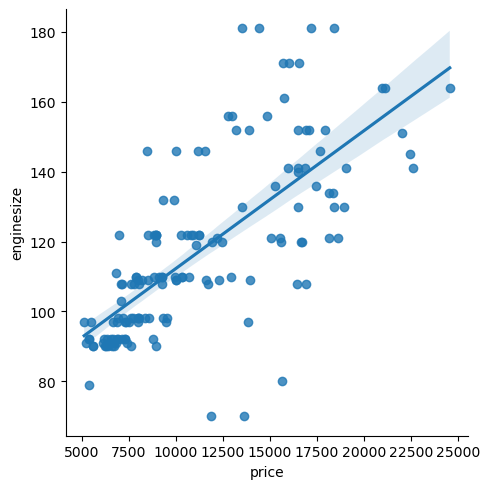

In [51]:
# Thử nghiệm kiểm tra và xử lý dữ liệu ngoại lai đối với các chỉ tiêu định lượng của mô hình car1
#Kiểm tra dữ liệu ngoại lai đối với 3 thuộc tính enginesize, curbweight và horsepower
#Trực quan bằng đồ thị
sns.lmplot(x='price', y="enginesize", data=train_set1)

<Axes: ylabel='curbweight'>

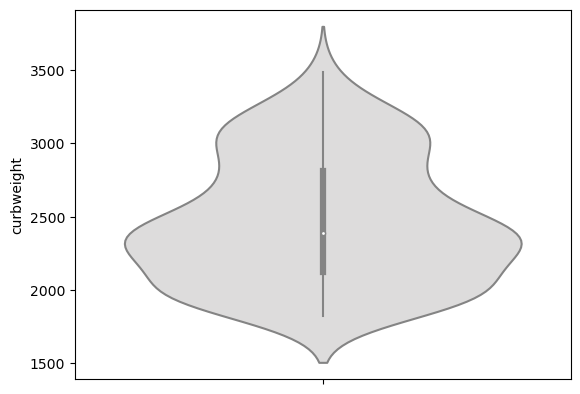

In [52]:
sns.violinplot(y=train_set1["curbweight"], palette="coolwarm")

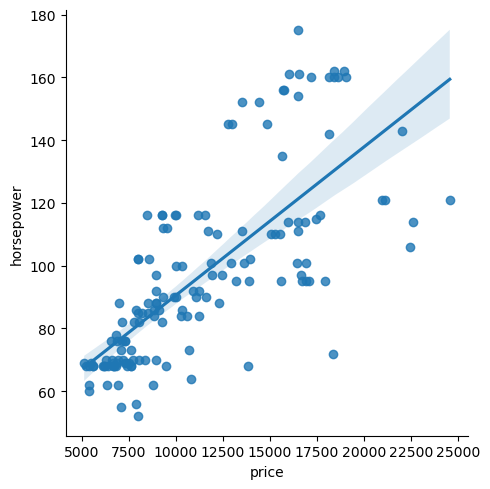

In [56]:
sns.lmplot(x='price', y="horsepower", data=train_set1)

In [ ]:
#Xử lý dữ liệu ngoại lai bằng IQR

In [47]:
Q1 = train_set1.loc[:, 'enginesize', 'curbweight', 'horsepower'] .quantile(0.2)
Q3 = train_set1.quantile(0.8)
IQR = Q3 - Q1
print(IQR)

drivewheel       1.00
fuelsystem       4.00
enginesize      44.00
curbweight     928.80
horsepower      47.00
carwidth         2.94
price         9361.80
dtype: float64


In [57]:
#Xem xét tỷ lệ dữ liệu bị loại bỏ nếu xử lý dữ liệu ngoại lai
noise = train_set1[((train_set1 < (Q1 - 1.5 * IQR)) | (train_set1 > (Q3 + 1.5 *IQR))).any(axis=1)]
train_set1= train_set1[~((train_set1 < (Q1 - 1.5 * IQR)) | (train_set1 > (Q3 + 1.5 *IQR))).any(axis=1)]
print(f'tỷ lệ dữ liệu bị loại bỏ nếu sử dung IQR: {round(len(noise)/len(train_set1)*100,2)}')
train_set1.info()

tỷ lệ dữ liệu bị loại bỏ nếu sử dung IQR: 0.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 66 to 102
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drivewheel  148 non-null    int32  
 1   fuelsystem  148 non-null    int32  
 2   enginesize  148 non-null    int64  
 3   curbweight  148 non-null    int64  
 4   horsepower  148 non-null    int64  
 5   carwidth    148 non-null    float64
 6   price       148 non-null    float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 8.1 KB


In [58]:
Xtrain=train_set1.iloc[:, :5].values
Xtrain
Xtest=test_set1.iloc[:, :5].values
ytrain=train_set1.iloc[:,-1]
ytrain
ytest=test_set1.iloc[:,-1]

In [59]:
#Tạo mô hình
from sklearn.linear_model import LinearRegression
car1_model = LinearRegression()
car1_model.fit(Xtrain, ytrain.ravel())
print(f' Điểm dữ liệu train: {car1_model.score(Xtrain, ytrain)}')
print(f' Điểm dữ liệu test: {car1_model.score(Xtest, ytest)}')

 Điểm dữ liệu train: 0.7606613321592437
 Điểm dữ liệu test: 0.634956096691857


# Kết luận:

Mô hình dựa trên dữ liệu Car1 với 6 thộc tính (5 thuộc tính định lượng và 1 thuộc tính định tính có tương quan lớn gồm: 
#'drivewheel','fuelsystem', 'enginesize', 'curbweight', 'horsepower','carwidth') cho kết quả tốt nhất sau khi thử nghiệm việc thay thế các thuộc tính có tương quan thấp hơn không làm tăng điểm cho mô hình. Việc loại bỏ dữ liệu ngoại lai khiến điểm của mô hình giảm sút đáng kể. Trường hợp mở rộng dữ liệu nghiên cứu cân nhắc lựa chọn vào mô hình 3 thuộc tính định lượng thay vì 6 để tinh giảm mô hình.